#Objective is to predict fraud 


In [10]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [23]:
#load data
df = pd.read_csv('transactions.csv', sep=",")

In [12]:
df.head()

,Unnamed: 0,CURRENCY,AMOUNT,TRAN_STATE,TRAN_CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,...,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS,CODE,NAME,CODE3,NUMCODE,PHONECODE,IS_FRAUDSTER_N
0,0,GBP,175,COMPLETED,46:20.3,cafe,GBR,cont,8f99c254-7cf2-4e35-b7e4-53804d42445d,CARD_PAYMENT,...,GB,1962.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
1,1,EUR,2593,COMPLETED,38:47.2,bar,AUS,cont,ed773c34-2b83-4f70-a691-6a7aa1cb9f11,CARD_PAYMENT,...,IE,1995.0,PASSED,0.0,IE,Ireland,iRL,372.0,353.0,0
2,2,EUR,1077,COMPLETED,34:39.7,NaN,CZE,cont,eb349cc1-e986-4bf4-bb75-72280a7b8680,CARD_PAYMENT,...,CZ,1985.0,PASSED,0.0,CZ,Czech Republic,CZE,203.0,420.0,0
3,3,GBP,198,COMPLETED,45:50.6,supermarket,GBR,cont,dc78fbc4-c936-45d3-a813-e2477ac6d74b,CARD_PAYMENT,...,GB,1974.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
4,4,EUR,990,COMPLETED,45:32.7,NaN,FRA,cont,32958a5c-2532-42f7-94f9-127f2a812a55,CARD_PAYMENT,...,FR,1991.0,PASSED,0.0,FR,France,FRA,250.0,33.0,0


In [13]:
#data summary
df.describe()

,Unnamed: 0,AMOUNT,AMOUNT_USD,EXPONENT,HAS_EMAIL,BIRTH_YEAR,FAILED_SIGN_IN_ATTEMPTS,NUMCODE,PHONECODE,IS_FRAUDSTER_N
count,57748.00000,5.774800e+04,5.774800e+04,57748.000000,55262.000000,55262.00000,55262.000000,55243.000000,55243.000000,57748.0
mean,28873.50000,3.955198e+04,5.993035e+06,2.009005,0.995729,1984.93795,0.008342,651.194341,105.287150,0.0
std,16670.55601,1.433153e+06,2.695487e+08,0.241621,0.065210,9.73848,0.127983,229.477925,128.115641,0.0
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,1930.00000,0.000000,40.000000,30.000000,0.0
25%,14436.75000,5.290000e+02,6.010000e+02,2.000000,1.000000,1981.00000,0.000000,440.000000,44.000000,0.0
50%,28873.50000,1.545000e+03,1.638000e+03,2.000000,1.000000,1987.00000,0.000000,826.000000,44.000000,0.0
75%,43310.25000,5.100000e+03,5.613250e+03,2.000000,1.000000,1992.00000,0.000000,826.000000,47.000000,0.0
max,57747.00000,1.775452e+08,2.373411e+10,8.000000,1.000000,2000.00000,6.000000,826.000000,590.000000,0.0


In [14]:
df_backup = df

In [15]:
df.shape

(57748, 32)

In [24]:
#drop first column
df = df.drop('Unnamed: 0', axis=1)

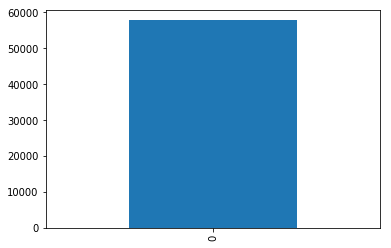

In [25]:
#check for data imbalance
pd.value_counts(df['IS_FRAUDSTER_N']).plot.bar()

In [26]:
#check for missing data and drop data
#remove empty data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()

In [27]:
df.shape

(19174, 31)

In [35]:
df.dtypes

CURRENCY                    object
AMOUNT                       int64
TRAN_STATE                  object
TRAN_CREATED_DATE           object
MERCHANT_CATEGORY           object
MERCHANT_COUNTRY            object
ENTRY_METHOD                object
USER_ID                     object
TYPE                        object
SOURCE                      object
TRAN_ID                     object
AMOUNT_USD                   int64
CCY                         object
EXPONENT                     int64
IS_CRYPTO                     bool
HAS_EMAIL                  float64
PHONE_COUNTRY               object
IS_FRAUDSTER                object
TERMS_VERSION               object
USER_CREATED_DATE           object
USER_STATE                  object
COUNTRY                     object
BIRTH_YEAR                 float64
KYC                         object
FAILED_SIGN_IN_ATTEMPTS    float64
CODE                        object
NAME                        object
CODE3                       object
NUMCODE             

In [37]:
df.tail(30)

,CURRENCY,AMOUNT,TRAN_STATE,TRAN_CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,...,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS,CODE,NAME,CODE3,NUMCODE,PHONECODE,IS_FRAUDSTER_N
57605,EUR,2280,COMPLETED,42:32.0,point_of_interest,FRA,mags,6de1c8b3-8be9-4530-ab9c-4f095779dc23,CARD_PAYMENT,GAIA,...,GB,1977.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
57609,EUR,1600,COMPLETED,55:48.2,night_club,ESP,cont,d59db8bf-b962-499c-9749-daacb329aa15,CARD_PAYMENT,GAIA,...,ES,1993.0,PASSED,0.0,ES,Spain,eSP,724.0,34.0,0
57612,GBP,1260,COMPLETED,44:13.3,atm,GBR,manu,79638a4e-e6df-43ae-8d82-14832364544b,CARD_PAYMENT,GAIA,...,ES,1991.0,PASSED,0.0,ES,Spain,eSP,724.0,34.0,0
57613,USD,2730,COMPLETED,12:35.5,pharmacy,USA,cont,0022f893-47c7-4da0-96df-7ea564bfd50d,CARD_PAYMENT,GAIA,...,GB,1983.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
57617,GBP,1077,COMPLETED,34:25.2,gas_station,USA,mags,be366695-8af7-4021-bf08-68bfefe88454,CARD_PAYMENT,GAIA,...,GB,1984.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
57618,GBP,460,COMPLETED,32:38.2,liquor_store,GBR,cont,73c21045-fc4f-47ac-87a6-e21888d9d645,CARD_PAYMENT,GAIA,...,GB,1994.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
57627,EUR,1586,COMPLETED,04:09.5,grocery_or_supermarket,USA,chip,0bc51d87-0b03-4a49-bd36-89734b0bd773,CARD_PAYMENT,GAIA,...,EE,1988.0,PASSED,0.0,EE,Estonia,EST,233.0,372.0,0
57633,EUR,230,COMPLETED,57:08.2,store,LTU,cont,13dcc570-fd32-445a-b320-ac961b036d18,CARD_PAYMENT,GAIA,...,LT,1990.0,PASSED,0.0,LT,Lithuania,lTU,440.0,370.0,0
57649,GBP,630,COMPLETED,30:11.7,hospital,GBR,cont,c46559ba-aa53-4231-a560-84cf87292f61,CARD_PAYMENT,GAIA,...,GB,1989.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0
57651,GBP,799,COMPLETED,14:51.9,bank,LUX,manu,e34b37ba-6c35-4758-b55d-96ca6509d506,CARD_PAYMENT,GAIA,...,GB,1980.0,PASSED,0.0,GB,United Kingdom,gBR,826.0,44.0,0


In [ ]:
df = df.drop(['Name','CODE3','C'], axis=1)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
#find important features
array = df.values
X = array[:,0:30]
Y = array[:,30]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  self.n_estimators = 10


ValueError: could not convert string to float: 'GBP'

In [ ]:
#fix data imbalance

In [ ]:
#split categorical data

In [ ]:
#split cts data

In [ ]:
#combine data

In [ ]:
#feature selection

In [ ]:
#perform modeling

In [ ]:
#parameter tuning - drop highly correlated independent variables in the model.

In [ ]:
#build metrics (confusion matrix, auc, roc, precision, recall)

In [ ]:
The precision-recall curve can help us determine if we were successful enough. 
For the unfamiliar precision-recall scores represent a balance between high recall 
and high precision relating to a low false positive rate and a low false negative rate respectively. 
When evaluating, you have four outcomes: true positive, true negative, false positive and false negative. 
Depending on the project, you would aim for different balances, 
but ideally you want everything to be as accurate, or true, as possible. 
In the graph above, the y axis is the precision and the x axis is recall. 
If the graph went straight across the middle, that would be a random-like output. 
Below it would be poor performance and above it would be a more accurate and better quality performance. 
If it were 100 it would be a perfect classifier. 
Because the classifier above is at 0.84 we can feel confident that our precision was good. 